# PENTING DAN MOHON PERHATIAN

Pada Preprocessing kode ini menggunakan 2 STOPWORDS, yaitu Stopwords bahasa Indonesia dan Stopwords bahasa Inggris. 

Langkah-langkah mengerjakan:
1. Run Preprocessing kode menggunakan stopwords Bahasa Indonesia terlebih dahulu, run sampai selesai

2. Run Preprocessing kode menggunakan stopwords Bahasa Inggris, dan run sampai selesai

# Analisa Sentimen menggunakan Algoritma Logistic Regression

In [ ]:
import numpy as np #linier algebra
import pandas as pd # data processing, CSV file I/O (e.g pd.read_csv)
import seaborn as sns

# Proses 1 (Input Data Training)

In [ ]:
#membaca data training = 1050 data
# df = pd.read_csv(r'juli2train.csv')
df = pd.read_csv('https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2train.csv')
df.head()

,label,tweet
0,1,rt @napqilla no ambisinya menguasai raky...
1,1,rt @pandji nah gue pikir sentimen petahana ok...
2,1,rt @pandji urutan pertama best moment #debat ...
3,1,rt @pandji ini artikel yg menjelaskan ternyat...
4,0,rt @mrtampi agus makin santai nahok makin sa...


In [ ]:
#menampilkan data label
y = df['label']
y[0:5]


0    1
1    1
2    1
3    1
4    0
Name: label, dtype: int64

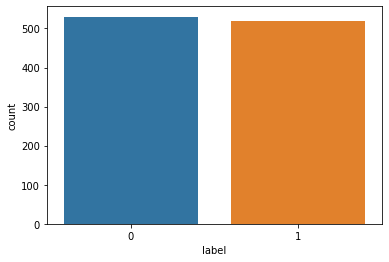

In [ ]:
#menampilkan grafik nilai dari variabel "label"
sns.countplot(x="label", data=df)

In [ ]:
#menghitung jumlah data masing-masing label
df["label"].value_counts()

0    530
1    520
Name: label, dtype: int64

# Proses 2 (preprocessing, case folding, stopword removal, steming )

# Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import requests
import re

# 1. Preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

In [ ]:
#simpan kata-kata stopword

# f=open('stopwordlist.txt')

url = "https://raw.githubusercontent.com/Wayan123/Sentiment-Analysis/main/stopwordlist.txt"
ina_stopword = requests.get(url).content

tempStoplist = []
for tempstp in ina_stopword.split():
  tempStoplist.append(tempstp)

In [ ]:
!pip install sastrawi

     |████████████████████████████████| 209 kB 7.0 MB/s 


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+" #regex untuk remove punctuation

def preprocessing(tweet):
  tweet = re.sub(TEXT_CLEANING_RE,'',str(tweet).lower()).strip() #casefolding dan remove punctuation
  tokens = []
  for token in tweet.split():
    if token not in tempStoplist: #jika token tidak di stopword maka simpan
      token = stemmer.stem(token) #lakukan stemming
      tokens.append(token) 
  return " ".join(tokens)

# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia

In [ ]:
# Mengimplementasikan preprocessing Menggunakan Stemming Sastrawi dan Stopwordlist Indonesia
# -+ 10 Menit
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprocessing(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

# HABIS INI LANGSUNG RUN KE PROSES 3 YAITU "Modeling dengan Metode Logistic Regression"

CPU times: user 5min 12s, sys: 632 ms, total: 5min 13s
Wall time: 5min 13s


Nahh, disini dalam proses preprocessing memakan waktu yang lama, yaitu sekitar 5 menit. 

HABIS INI LANGSUNG RUN KE PROSES 3 YAITU "Modeling dengan Metode Logistic Regression"

# 2. Preprocessing Menggunakan Stemming English dan Stopwordlist English

In [ ]:
nltk.download('stopwords')

stop_words = stopwords.words("english")
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#preprocessing, case folding, stopword removal, steming

TEXT_CLEANING_RE = "@#=-_\S+|https?:\S+http?:\S|{^A-Za-z}+"
def preprocess(tweet, stem=False): 
    #Remove link,user and special characters
    tweet = re.sub(TEXT_CLEANING_RE,'',str(tweet).lower()).strip()
    tokens = []
    for token in tweet.split():
        if token not in stop_words:
            if stem:
                tokens.append(stemmer.stem(token))
            else:
                  tokens.append(token)
    return " ".join(tokens)

Mengimplementasikan preprocessing dengan Menggunakan Stemming English dan Stopwordlist English

In [ ]:
# Mengimplementasikan preprocessing dengan Menggunakan Stemming English dan Stopwordlist English
%%time

df['clean_twt'] = df.tweet.apply(lambda x: preprocess(x))
df['clean_twt'] = df.clean_twt.str.replace('rt', '')
df.head()

CPU times: user 82.5 ms, sys: 465 µs, total: 83 ms
Wall time: 82.2 ms


Dan, disini dengan menggunakan stopwords bahasa Inggris waktu preprocessing tidak memakan waktu lama.

# Proses 3 (Modeling dengan Metode Logistic Regression)

# Logistic Regression

In [ ]:
#melakukan pemodelan prediksi

%%time

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, log_loss

#membangun vector space model/pembobotan dengan tfidf
vectorizer = TfidfVectorizer(ngram_range=(1,3), min_df=10)
features = vectorizer.fit_transform(df.clean_twt)

#melakukan split data training untuk mengetahui akurasi
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=4)

#modeling sentiment
LR_ = LogisticRegression(C=3, solver='liblinear', max_iter=150).fit(X_train, y_train)



CPU times: user 88.9 ms, sys: 989 µs, total: 89.9 ms
Wall time: 97.7 ms


In [ ]:
features

<1050x544 sparse matrix of type '<class 'numpy.float64'>'
	with 13126 stored elements in Compressed Sparse Row format>

# Proses 4 (Evaluation)

# Evaluation

In [ ]:
#melakukan evaluasi
yhat = LR_.predict(X_test)
print('F1 score : ', f1_score(y_test, yhat, average='weighted'))

yhat_prob = LR_.predict_proba(X_test)
print ('Log Loss : ', log_loss(y_test, yhat_prob))

F1 score :  0.7477404429785384
Log Loss :  0.474976506543103


# Proses 5 (End Process : Prediction of Data Testing)

# Testing Prediksi

# Prediction

In [ ]:
#melakukan prediksi untuk data yang tidak diketahui labelnya

#lakukan preprocessing untuk data yang tidak diketahui labelnya
# df_test = pd.read_csv('juli2test.csv')
df_test = pd.read_csv(r'https://raw.githubusercontent.com/rasyidev/well-known-datasets/main/juli2test.csv')
df_test.head()

,tweet
0,soal quran polisi harus cari saksi yang den...
1,wajar rachmawati tersinggung megawati bawa ...
2,rt @l n chirpified mengapa anies b gaga...
3,rt @sibonekakayu kegaduhan yg diciptakan ah...
4,vivacoid ini video saat nusron wahid kritik...


In [ ]:
#casefolding, filtering, steming data yang tidak diketahui labelnya

# 1. Ganti PROCESSING jika pakai stopword Indonesia
# 2. Ganti PROCESS jika pakai stopword English

%%time

df_test['clean_twt'] = df_test.tweet.apply(lambda x: preprocessing(x))
df_test['clean_twt'] = df_test.clean_twt.str.replace('rt','')
df_test.head()

CPU times: user 272 ms, sys: 0 ns, total: 272 ms
Wall time: 274 ms


In [ ]:
#pembobotan data yang tidak diketahui labelnya
#vector_test = TfidfVectorizer(ngram_range=(1,3), min df=10)
#feature_test = vector_test.fit_transform(df_test.clean_twt)

In [ ]:
#melakukan training
def training_step(data, vectorizer) :
    features = vectorizer.fit_transform(df.clean_twt)
    LR_ = LogisticRegression(C = 3, solver='liblinear', max_iter=150).fit(features,y)
    return LR_

#melakukan testing
classifier = training_step(df.clean_twt, vectorizer)
result = classifier.predict(vectorizer.transform(df_test.clean_twt))

#result

In [ ]:
#simpan hasil
np.savetxt('hasil_prediksi_juli.txt', result, fmt='%i', delimiter='\n')

In [ ]:
df_hasil = pd.read_csv(r'hasil_prediksi_juli.txt')
df_hasil.head()

,1
0,1
1,0
2,1
3,0
4,1


In [ ]:
def prediksi_komentar(comment):
  result = classifier.predict(vectorizer.transform([comment]))
  if result == 1:
    return "Positif"
  else:
    return "Negatif"

In [ ]:
prediksi_komentar('Wah ahok cocok jadi presiden nih')

'Positif'